In [1]:
import cv2
import random
import math
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
%matplotlib inline  
import glob
import os
import numpy as np
from IPython.display import display, clear_output

## Make date stamps on food11 images

In [2]:
# Make date stamps on food11 images
def put_date_on_image(img):
    random_time = timedelta(seconds=random.randint(0,math.pow(10,9)))
    random_date = (str(datetime.now() + random_time)[:10])
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(random_date, font, 1, 2)
    x_max = len(img[0]) - text_size[0][0] # image length - text length
    y_min = text_size[0][1]  # text height
    y_max = len(img)  # image height
    pos = (random.randint(0, x_max), random.randint(y_min, y_max))
    draw = cv2.putText(img, random_date, pos, font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return draw.reshape(draw.shape[0], draw.shape[1], 3)

## Show some of the images in jupyter

In [3]:
# Show some of the images in jupyter
def show(imgs, num=10):
    n = num
    plt.figure(figsize=(18, 18))

    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(imgs[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## Process all food11 images

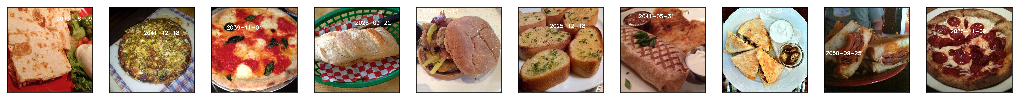

In [14]:
data_dir = "evaluation_256" # gives the path
save = True # if you want to save to pc
save_dir = data_dir + "_datestamp"
if save and not os.path.exists(save_dir):
    os.mkdir(save_dir)
data_path = os.path.join(data_dir, '*g')
files = glob.glob(data_path)

data = []
for f in files:
    clear_output(wait=True)
    img = cv2.imread(f)
    draw = put_date_on_image(np.asarray(img))
    data.append(draw[:, :, ::-1])
    if not save:
        if '20' in f:
            break
    else:
        f_new = os.path.join(save_dir, f.split('\\')[1])
        display("saving images with date stamp:", f_new)
        cv2.imwrite(f_new, img)
clear_output(wait=True)
show(data)